# Multi Resolution Permutation Procesure (MRPP)

The MRPP is a multivariate non-parametric test of whether there is a significant difference between groups within each individual variable. The MRPP provides change-corrected group agreement (A) and significance (P) values. Similar to the coefficient of determination, A ranges from 0 to 1, showing the level of discrimination between groups. Accordingly, a hypothetical A value of 1 implies that an indicator thoroughly explains the variance between clases. In contrast, an A value of 0 implies that the indicator does not explain the clases.

In [1]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [24]:
setwd('/home/javierlopatin/Documentos/temp/Siusun')

In [4]:
rmse = read.csv('points_rmse.csv', header = T)
# pheno = read.csv('TSS_phen_all.csv', header = T)
lsp = read.csv('points_LSP.csv', header = T)
clusters = read.csv('cluster_phen_all.csv')
dem = read.csv('points_dem.csv')
tpi = read.csv('TPI.csv')

In [5]:
# all = cbind(clusters, pheno[,2:ncol(pheno)], rmse[,2:ncol(rmse)], lsp[,2:ncol(lsp)], dem$DEM, tpi[,2])
all = cbind(clusters, rmse[,2:ncol(rmse)], lsp[,2:ncol(lsp)], dem$DEM, tpi[,2])
all = na.omit(all)
# colnames(all) =c( "vegclass", "clusters", colnames(pheno)[2:ncol(pheno)], "rmse_all", "rmse_sos", "rmse_pos", "rmse_eos",
#                   'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU', 'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW', "dem", "tpi") 
colnames(all) =c( "vegclass", "clusters", "rmse_all", "rmse_sos", "rmse_pos", "rmse_eos",
                  'SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU', 'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW', "dem", "tpi") 

all = na.omit(all)

all$clusters = as.factor(all$clusters)

str(all)

'data.frame':	2572 obs. of  24 variables:
 $ vegclass: Factor w/ 16 levels "Annual Grasses and Forbs",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ clusters: Factor w/ 5 levels "0","1","2","3",..: 4 4 4 2 1 4 4 4 4 4 ...
 $ rmse_all: num  7.85 7.55 7.19 8.99 14.38 ...
 $ rmse_sos: num  32.6 29 32.6 20.5 30.2 ...
 $ rmse_pos: num  3.9 2.01 2.46 3.88 7.61 ...
 $ rmse_eos: num  47.74 20.06 5.11 16.89 72.88 ...
 $ SOS     : num  80.9 89 78.6 89.1 81 ...
 $ POS     : num  177 173 153 167 158 ...
 $ EOS     : num  325 318 245 258 331 ...
 $ vSOS    : num  1203 1849 1691 793 1130 ...
 $ vPOS    : num  7504 8524 8562 4373 3884 ...
 $ vEOS    : num  1470 1457 4588 1514 1492 ...
 $ LOS     : num  244 229 166 169 250 ...
 $ MSP     : num  127 127 113 124 120 ...
 $ MAU     : num  249 242 199 210 241 ...
 $ vMSP    : num  5334 6093 4984 2364 2272 ...
 $ vMAU    : num  2841 3466 7211 2936 3070 ...
 $ AOS     : num  6800 7333 7409 4088 2934 ...
 $ IOS     : num  1025750 1126375 985631 464582 650494 ...
 

In [14]:
head(all)

,vegclass,clusters,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tule-Cattail,3,7.851385,32.63096,3.896140,47.736321,80.87057,177.0662,324.7869,1202.5060,⋯,248.7252,5334.024,2841.283,6800.173,1025749.9,65.62941,-40.89175,0.2527533,1823.6305,213.00000
2,Tule-Cattail,3,7.549890,28.95659,2.009433,20.063142,89.00000,173.0000,318.0000,1848.8770,⋯,242.0000,6093.218,3466.011,7333.495,1126375.2,79.46150,-48.73224,0.1808289,2054.1077,-1.64365
3,Tule-Cattail,3,7.187965,32.63771,2.460131,5.109756,78.61936,152.6778,244.8710,1691.0969,⋯,198.6616,4984.047,7211.328,7409.140,985631.4,93.53018,-43.86690,-0.6824750,2186.7802,34.79442
4,Tule-Cattail,1,8.988967,20.48287,3.884497,16.885301,89.13319,166.6149,258.1697,793.4783,⋯,210.2925,2364.427,2936.376,4088.157,464582.1,46.15378,-30.38030,-0.1585804,1661.1287,-38.18615
6,Tule-Cattail,0,14.383717,30.19954,7.608656,72.879587,81.00000,158.0000,331.3791,1129.5296,⋯,241.3389,2271.550,3070.493,2933.663,650493.9,35.77537,-13.78752,-0.4024138,-196.6292,-43.28105
7,Tule-Cattail,3,8.335444,20.42485,2.195180,30.690648,89.00000,175.1976,325.0000,1502.7268,⋯,249.0000,5462.123,2402.663,6412.117,956641.3,67.83360,-41.18478,0.2692295,2016.8529,-16.36991


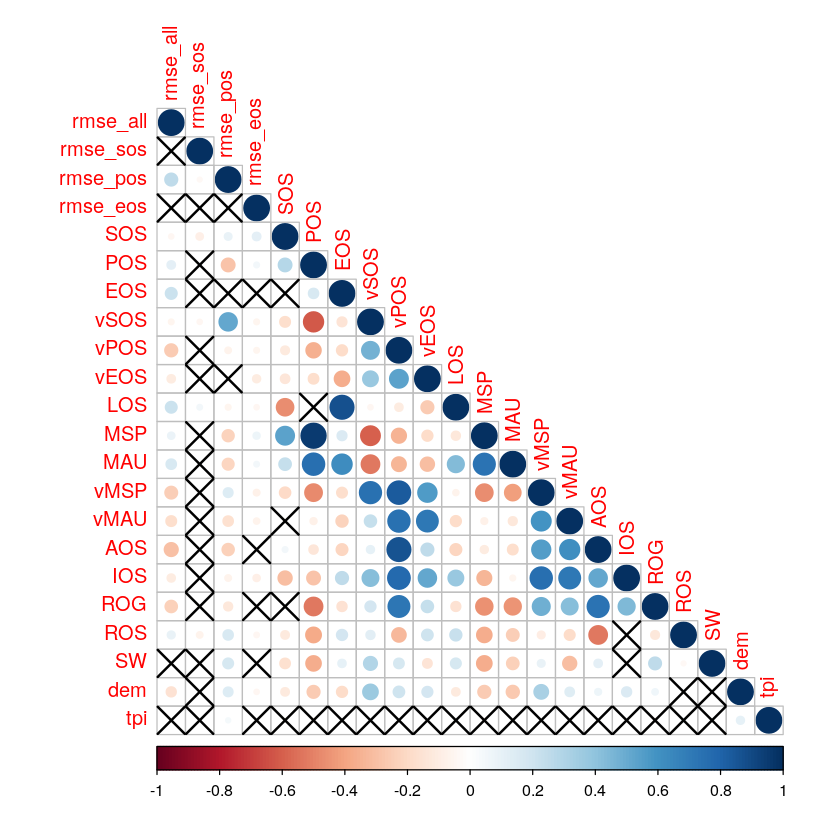

In [51]:
# install.packages('corrplot')
require('corrplot')

# colnames(all[,3:ncol(all)])
M = cor(all[,3:ncol(all)])
testRes = cor.mtest(all[,3:ncol(all)], conf.level = 0.95)

corrplot(M, p.mat = testRes$p, sig.level = 0.05, addrect = 2, type="lower")

In [15]:
# create empty matrices
mat_veg  = matrix(NA, ncol=ncol(all)-2, nrow=2)
colnames(mat_veg) = colnames(all)[3:ncol(all)]
rownames(mat_veg) = c("A", "P")

mat_clust  = matrix(NA, ncol=ncol(all)-2, nrow=2)
colnames(mat_clust) = colnames(all)[3:ncol(all)]
rownames(mat_clust) = c("A", "P")

In [18]:
# run MRPP through the variables
MRPP <- function(X, Y, mat, num_cores = 6){
    pb <- txtProgressBar(min = 0, max = ncol(all), style = 3,  width = 50, char = "=") # progress bar
    length = ncol(X)
    for(i in 1:length){
      obj_mrpp = mrpp(dat = X[,i], grouping = Y, parallel = num_cores, distance = "mahalanobis")
      mat[1,i] = obj_mrpp$A
      mat[2,i] = obj_mrpp$Pvalue
      setTxtProgressBar(pb, i)
    }
    close(pb) # close progress bar
    return(mat)
}

## Calculate for original vegetation types and clusters

In [19]:
# vegetation types
mrpp_veg = MRPP(all[,3:ncol(all)], all$vegclass, mat_veg)
mrpp_veg

  |==============================================    |  92%


,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
A,0.04559655,0.008169716,0.06171752,0.0130357,0.04830899,0.1131002,0.02264656,0.1808167,0.06329915,0.08127387,⋯,0.0839551,0.1188777,0.04470523,0.03227999,0.09254961,0.04328615,0.03668732,0.04194716,0.2065258,0.01389629
P,0.00100000,0.002000000,0.00100000,0.0010000,0.00100000,0.0010000,0.00100000,0.0010000,0.00100000,0.00100000,⋯,0.0010000,0.0010000,0.00100000,0.00100000,0.00100000,0.00100000,0.00100000,0.00100000,0.0010000,0.00100000


In [20]:
# phenology types
mrpp_clust = MRPP(all[,3:ncol(all)], all$clusters, mat_clust)
mrpp_clust

  |==============================================    |  92%


,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
A,0.03103616,0.007343752,0.08816704,0.02749236,0.05102985,0.2016369,0.02539976,0.3748512,0.3823349,0.310739,⋯,0.141487,0.4207446,0.3887799,0.1753231,0.3851342,0.1197411,0.05068783,0.1174107,0.08282906,0.0005622185
P,0.00100000,0.001000000,0.00100000,0.00100000,0.00100000,0.0010000,0.00100000,0.0010000,0.0010000,0.001000,⋯,0.001000,0.0010000,0.0010000,0.0010000,0.0010000,0.0010000,0.00100000,0.0010000,0.00100000,0.1340000000


In [21]:
save.image('mrpp.RData')

In [39]:
# functions to plot the relatve importance using inferno colors
library("viridis")  

# add coefficients
colorpal <-  inferno(100)

varImp <- function(varImport = mrpp_lsp){
   # variables from ensemble
    imp <- varImport

    # matices of varImport
    z1 <- matrix (rep (imp, 100), ncol=100)

    # MRFF coefficients
    wl = seq(length(imp))
    #image(wl, seq(0, 100, 1), z1, xlim = c(min(wl)-10, max(wl)+10), xlab=expression(lambda(nm)), col=blueish, ylab="", axes=F, cex.lab = 1.3)
    image(wl, seq(0, 100, 1), z1, xlim = c(min(wl)-10, max(wl)+10), xlab="", col=colorpal  , ylab="", axes=F, cex.lab = 1.3)    
}

In [24]:
svg('mrpp_veg.svg')
varImp(mrpp_veg[1, ])
dev.off()

png 
  2

In [26]:
svg('mrpp_clust.svg')
varImp(mrpp_clust[1, ])
dev.off()

png 
  2

# Variable importance using PLS-DA

We determined the contribution of each indicator to discern the vegetation and phenology classes by applying using Partial Least Squares Discriminant Analysis (PLS-DA) with a bootstrapping iteration procedure, wherein each iteration (100) we:

- Fitted a general model using all indicators and observations available and stored the overall Kappa (Kall) value;
- Fitted a indicator-wise partial models by randomizing the values of one indicator at the time in a stepwise procedure, storing one K value for each indicator replacement (Ki);
- Estimated the relative contribution of each indicator by subtracting the indicator-wise partial model from the overall model (Kall ₋ Ki), generating a delta Kappa per indicator (ΔK).

We used on average 63% samples for model training and 37% for validation during each iteration. We used PLS models on the training samples using a 5-fold cross-validation approach. We stored the results of the 100 iterations to present the distribution of ΔK and prevent stochastic biases (Kattenborn et al., 2019)

In [27]:
head(all)

,vegclass,clusters,rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tule-Cattail,3,7.851385,32.63096,3.896140,47.736321,80.87057,177.0662,324.7869,1202.5060,⋯,248.7252,5334.024,2841.283,6800.173,1025749.9,65.62941,-40.89175,0.2527533,1823.6305,213.00000
2,Tule-Cattail,3,7.549890,28.95659,2.009433,20.063142,89.00000,173.0000,318.0000,1848.8770,⋯,242.0000,6093.218,3466.011,7333.495,1126375.2,79.46150,-48.73224,0.1808289,2054.1077,-1.64365
3,Tule-Cattail,3,7.187965,32.63771,2.460131,5.109756,78.61936,152.6778,244.8710,1691.0969,⋯,198.6616,4984.047,7211.328,7409.140,985631.4,93.53018,-43.86690,-0.6824750,2186.7802,34.79442
4,Tule-Cattail,1,8.988967,20.48287,3.884497,16.885301,89.13319,166.6149,258.1697,793.4783,⋯,210.2925,2364.427,2936.376,4088.157,464582.1,46.15378,-30.38030,-0.1585804,1661.1287,-38.18615
6,Tule-Cattail,0,14.383717,30.19954,7.608656,72.879587,81.00000,158.0000,331.3791,1129.5296,⋯,241.3389,2271.550,3070.493,2933.663,650493.9,35.77537,-13.78752,-0.4024138,-196.6292,-43.28105
7,Tule-Cattail,3,8.335444,20.42485,2.195180,30.690648,89.00000,175.1976,325.0000,1502.7268,⋯,249.0000,5462.123,2402.663,6412.117,956641.3,67.83360,-41.18478,0.2692295,2016.8529,-16.36991


In [6]:
library(caret)

tr_control <- trainControl(method = 'cv', number = 10)

# train model using vegetation clases
PLS_veg <- train(x=all[,3:ncol(all)], y=all$vegclass , method = "pls",  tuneLength=20, 
               trControl = tr_control, preProcess = c("center", "scale"), 
               metric = "Kappa", maximize = T, na.action=na.omit)

Loading required package: lattice

Loading required package: ggplot2

Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in

Partial Least Squares 

2572 samples
  22 predictor
  16 classes: 'Annual Grasses and Forbs', 'Baccharis (Riparian)', 'Barren', 'Coyote Brush', 'Eucalyptus', 'Interior Mixed Hardwood', 'Non-Native/Invasive Grass', 'Non-Native/Ornamental Shrub', 'Perennial Grasses and Forbs', 'Pickleweed-Cordgrass', 'Riparian Mixed Shrub', 'Saltbush', 'Tule-Cattail', 'Wet Meadows', 'Willow', 'Willow-Alder' 

Pre-processing: centered (22), scaled (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2316, 2315, 2313, 2316, 2315, 2314, ... 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa    
   1     0.4070866  0.0391900
   2     0.4304364  0.1122179
   3     0.4277217  0.1161935
   4     0.4494878  0.1507634
   5     0.4514288  0.1530985
   6     0.4534015  0.1563749
   7     0.4580422  0.1630376
   8     0.4526007  0.1541378
   9     0.4611853  0.1695066
  10     0.4592276  0.1694716
  11     0.4619514  0.1737573
  12     0.4588279  0.1686017
  13     0.4619333  0

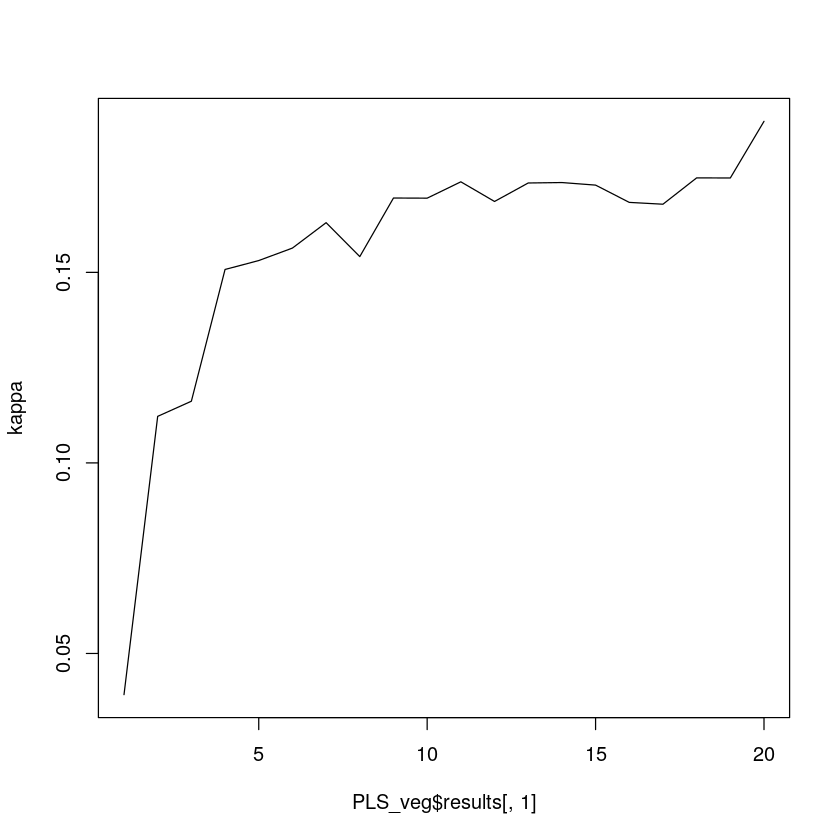

In [7]:
PLS_veg
plot(PLS_veg$results[, 1], PLS_veg$results[, 3], type='l', ylab='kappa')

In [30]:
# train model using cluster clases
PLS_clust <- train(x=all[,3:ncol(all)], y=all$clusters , method = "pls",  tuneLength=20, 
               trControl = tr_control, preProcess = c("center", "scale"), 
               metric = "Kappa", maximize = T, na.action=na.omit)

Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”


Partial Least Squares 

2572 samples
  22 predictor
   5 classes: '0', '1', '2', '3', '4' 

Pre-processing: centered (22), scaled (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2316, 2316, 2316, 2314, 2315, 2315, ... 
Resampling results across tuning parameters:

  ncomp  Accuracy   Kappa    
   1     0.5198658  0.3273884
   2     0.6100682  0.4784205
   3     0.6586422  0.5419608
   4     0.6738115  0.5642777
   5     0.6742036  0.5648864
   6     0.6866340  0.5828376
   7     0.6936184  0.5920921
   8     0.6920664  0.5899599
   9     0.6967479  0.5955509
  10     0.6979077  0.5969640
  11     0.6994535  0.5991811
  12     0.6955503  0.5937679
  13     0.6979121  0.5973299
  14     0.6978985  0.5974403
  15     0.7013899  0.6020478
  16     0.7013839  0.6017654
  17     0.6978849  0.5970829
  18     0.6951506  0.5934553
  19     0.6959379  0.5944842
  20     0.6967221  0.5955947

Kappa was used to select the optimal model using the largest value.
The final valu

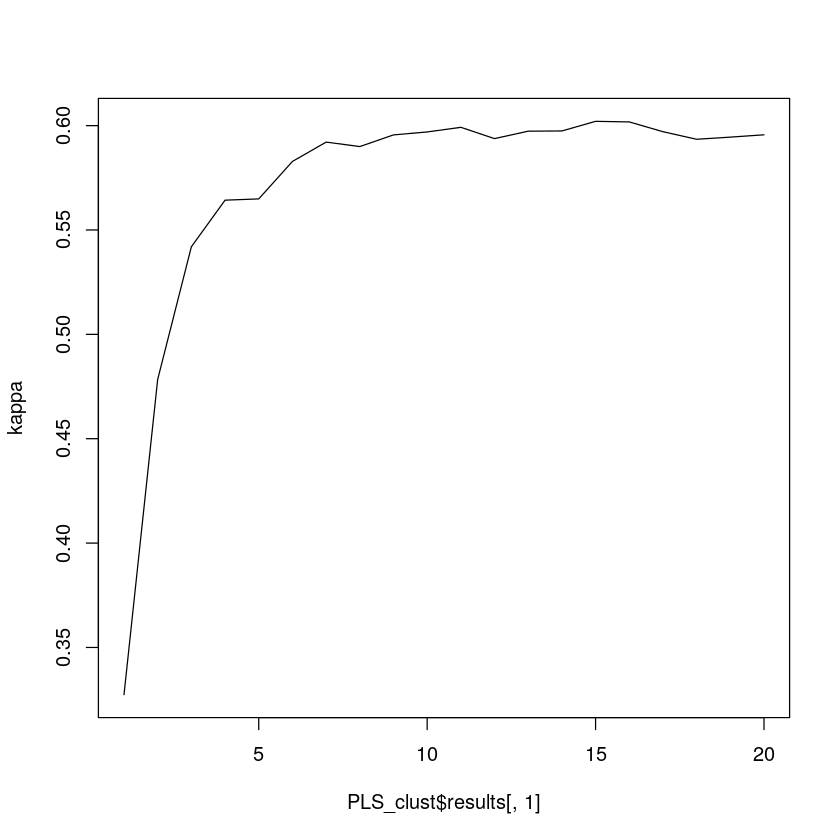

In [31]:
PLS_clust
plot(PLS_clust$results[, 1], PLS_clust$results[, 3], type='l', ylab='kappa')

In [32]:
relPLSimp = function(X, Y, ncomp, iter=100){
    #############################################################
    #
    # Estimate relative importance using PLS-DA by using Kappa 
    # and predicting values in random variables
    #
    # Y = observed classes (vector of Factor class)
    # X = predictors (data frame of numerical variables)
    # iter = number of bootstrap iterations (intener)
    #
    ##############################################################
     
    kappa <- matrix(nrow = iter, ncol = ncol(X))
    colnames(kappa) = colnames(X)
    
    boot <- createResample(Y, times = iter, list = TRUE)
    
    pb <- txtProgressBar(min = 0, max = iter, style = 3, width = 50, char = "=") 

   for (i in 1:iter){ # bootstraps
          
      train_X <- X[boot[[i]],]
      train_Y <- Y[boot[[i]]]  
      val_X   <- X[-boot[[i]],]
      val_Y   <- Y[-boot[[i]]]

      PLS  <- caret::plsda(x = train_X, y = train_Y, ncomp = ncomp, probMethod = 'softmax')
      pred <- predict(PLS, val_X)

      mat_pls <- confusionMatrix(pred, val_Y)

      for (k in 1:(ncol(X))){ # loop through variables
        validar_rand  <- val_X
        kappp = c()
         for (j in 1:10){ # 10 random replaces per variable
             validar_rand[,k]  <- runif(nrow(validar_rand), min=min(validar_rand[,k]), max=max(validar_rand[,k]))
             pred_rand <- predict(PLS, validar_rand)
             mat_pls_rand <- confusionMatrix(pred_rand, val_Y)
             kappp[j] <- mat_pls_rand$overall[2]
          }
        # delta kappa
        kappa[i,k] <- mat_pls$overall[2] - median(kappp)
      }
    setTxtProgressBar(pb, i)
    }
    close(pb)
    return(kappa)
}


In [47]:
imp_veg = relPLSimp(X=all[,3:ncol(all)], Y=all$vegclass, ncomp=10, iter = 100)
head(imp_veg)

rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
0,0.11664096,0,0.06303260,0.001455390,0.0027771705,0.03260034,0.032152616,0.07479183,0.038905916,⋯,0.036539659,0.02563283,0.0197690933,0.017256327,0.048616105,0.0131564570,0.0034352910,0,0.1026652138,0.009670737
0,0.08532785,0,0.07398044,-0.002058666,0.0007198182,0.01517574,0.067598540,0.00857331,0.054448155,⋯,0.036011916,0.02395762,0.0211360507,0.012109659,0.015453912,0.0044630622,-0.0038495049,0,0.1266486407,-0.003973597
0,0.01113623,0,0.08632161,-0.003916544,-0.0034311816,0.03110538,0.009512971,0.04006427,0.004603652,⋯,0.031017700,0.02111652,-0.0011759590,-0.014654187,-0.006827745,0.0051667074,-0.0003249955,0,0.0490917194,-0.002237209
0,0.02599871,0,0.07030370,-0.006548632,-0.0079497252,0.01818191,0.007140993,0.02607374,0.007121635,⋯,0.024371651,0.02455181,0.0003992754,0.001719119,0.008248814,0.0138065055,0.0002866756,0,0.0231714051,0.007611016
0,0.08592318,0,0.11834059,-0.005011414,-0.0068312307,0.02594995,0.025264037,0.06197196,0.022537338,⋯,0.031038627,0.02886425,0.0241119714,0.002907806,0.005769260,0.0088533187,0.0019109190,0,0.0862656454,0.001328071
0,0.02685559,0,0.03079753,-0.011392703,-0.0141140052,0.01200963,0.017201486,-0.02947023,-0.023700400,⋯,0.009661724,-0.01045916,0.0058064708,-0.015447474,-0.025393629,-0.0002695824,-0.0018966852,0,-0.0004394935,-0.003683683


In [49]:
imp_clust = relPLSimp(X=all[,3:ncol(all)], Y=all$clusters, ncomp=7, iter = 100)
head(imp_clust)

rmse_all,rmse_sos,rmse_pos,rmse_eos,SOS,POS,EOS,vSOS,vPOS,vEOS,⋯,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW,dem,tpi
0,-2.410845e-03,0.00000000,0.01946032,4.702982e-05,0.000000e+00,0.000000e+00,0.3152352,0.09125288,0.2345873,⋯,1.333822e-03,0.04430979,0.2005516,0.07267165,0.3357145,0.000000000,0.000000e+00,0,0.04135657,0.000000e+00
0,4.733820e-05,0.00000000,0.01436755,0.000000e+00,0.000000e+00,0.000000e+00,0.3182340,0.10638114,0.2938048,⋯,6.215432e-05,0.03733832,0.1929063,0.08764061,0.3520984,-0.001435797,0.000000e+00,0,0.13764435,1.465286e-03
0,1.324120e-03,0.00000000,0.01415877,0.000000e+00,1.428297e-03,0.000000e+00,0.3906313,0.13785955,0.2723632,⋯,-1.419075e-03,0.04625161,0.1684678,0.08548768,0.3691377,0.000000000,0.000000e+00,0,0.11467356,0.000000e+00
0,2.038112e-05,0.00000000,0.04133432,1.456045e-03,2.894619e-03,1.569597e-03,0.3335947,0.09981954,0.2491051,⋯,1.370952e-03,0.09915044,0.1814913,0.08556634,0.3623017,0.000000000,4.076224e-05,0,0.01637113,4.076224e-05
0,2.513670e-03,0.00000000,0.01409467,-1.382774e-05,-8.352813e-05,-1.382774e-05,0.3175704,0.09836348,0.2557441,⋯,-1.440996e-03,0.08072508,0.1668941,0.07359062,0.3447009,0.000000000,-2.765452e-05,0,0.16241099,-1.447884e-03
0,-2.667381e-03,0.00140396,0.05825718,0.000000e+00,7.872162e-04,1.273310e-03,0.3183512,0.10279933,0.2593198,⋯,1.439239e-03,0.10124203,0.1619844,0.06795373,0.3278748,0.002808212,0.000000e+00,0,0.15099132,5.351335e-04


In [35]:
save(imp_veg, file='plsImp_veg.RData')
save(imp_clust, file='plsImp_clust.RData')

In [36]:
write.csv(imp_veg, file='imp_veg.csv')
write.csv(imp_clust, file='imp_clust.csv')

In [1]:
# load data
load(file='plsImp_veg.RData')
load(file='plsImp_clust.RData')
load('mrpp.RData')

In [26]:
# variable importance
PLS_veg2 <- update(PLS_veg, param = list(ncomp = 10))
plscf <- as.vector(rowMeans(PLS_veg2$finalModel$coefficients)) ## extract coeff.
plscf <- plscf / sd (plscf) ## scale regression coefficients

svg('Figures/imp_veg_coeff.svg', width = 10, height = 5)
barplot(plscf, las=1)
dev.off()

Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'ignore'”
Warning message in fitFunc(X, Y, ncomp, Y.add = Y.add, center = center, ...):
“No convergence in 100 iterations
”


png 
  2

In [27]:
apply(imp_veg,2,median)

rmse_all      rmse_sos      rmse_pos      rmse_eos           SOS 
 0.0000000000  0.0517691812  0.0000000000  0.0630292235 -0.0039559623 
          POS           EOS          vSOS          vPOS          vEOS 
-0.0064794781  0.0255081465  0.0305279455  0.0131104360 -0.0065304779 
          LOS           MSP           MAU          vMSP          vMAU 
 0.0000000000  0.0001522811  0.0256104129  0.0149394617  0.0038023196 
          AOS           IOS           ROG           ROS            SW 
 0.0034073195  0.0024915751  0.0079465908  0.0003531932  0.0000000000 
          dem           tpi 
 0.0733538134 -0.0001202380

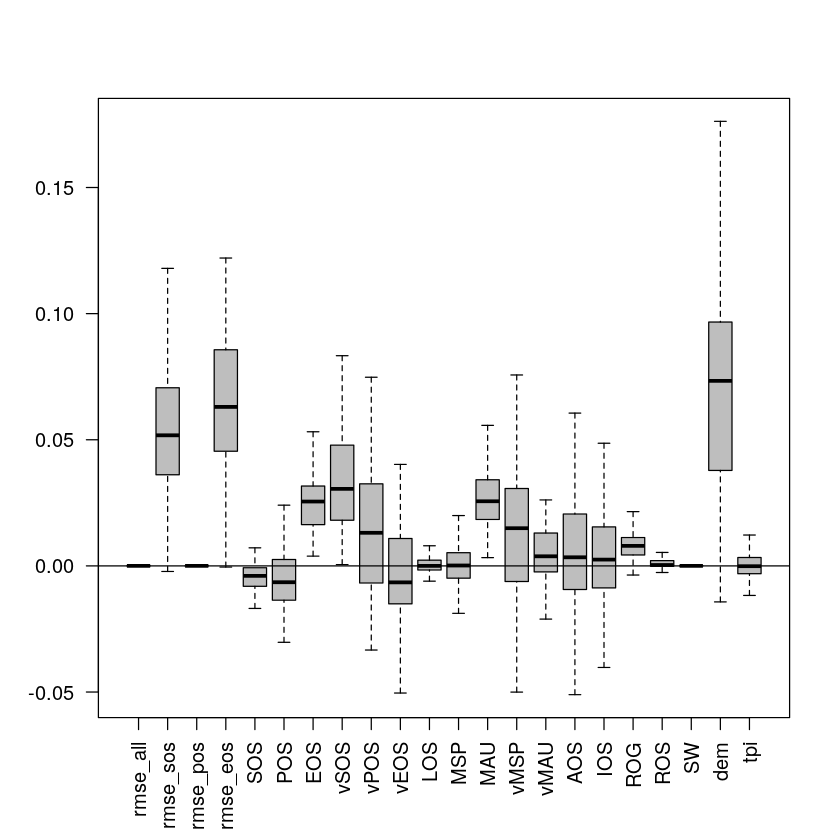

In [3]:
# svg('img_veg.svg', width = 12, height = 3)
boxplot(imp_veg, col='gray', outline=FALSE, las=2)
abline(0,0)
# dev.off()

In [45]:
svg('imp_veg_matrix.svg')
varImp(apply(imp_veg,2,median))
dev.off()

png 
  2

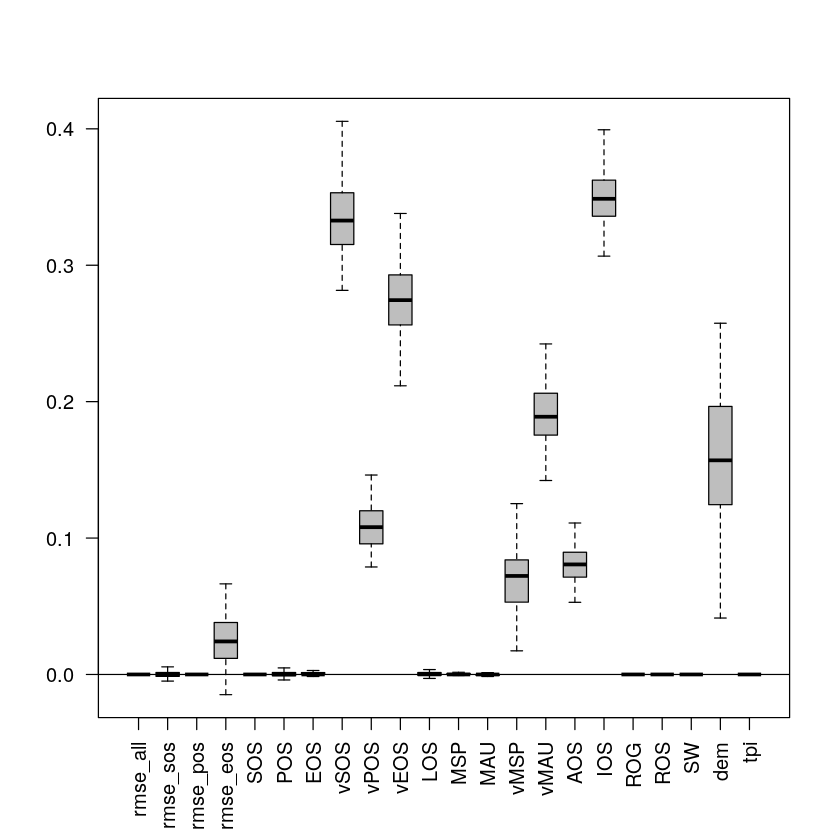

In [4]:
# svg('img_clust.svg', width = 12, height = 3)
boxplot(imp_clust, col='gray', outline=FALSE, las=2)
abline(0,0)
# dev.off()

In [46]:
svg('imp_clust_matrix.svg')
varImp(apply(imp_clust,2,median))
dev.off()

png 
  2

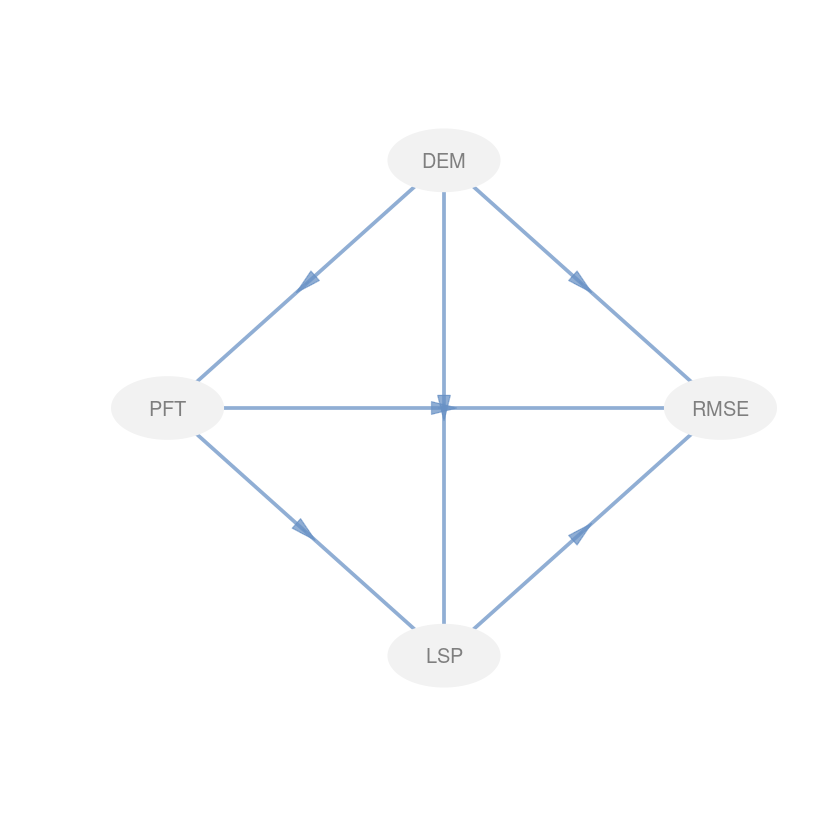

In [54]:
require(plspm)

## Set the inner model
# rows of the inner model matrix
DEM   = c(0, 0, 0, 0)
PFT   = c(1, 0, 0, 0)
LSP   = c(1, 1, 0, 0)
RMSE = c(1, 1, 1, 0)

# matrix created by row binding. Creación de las variables latentes(Agrupaciones ficticias de las variables respuesta y predictoras)
inner = rbind(DEM, PFT, LSP, RMSE)

# add column names (optional)
colnames(inner) = rownames(inner)

# plot the inner matrix
innerplot(inner)

In [56]:
colnames(all)
length(all)

[1] "vegclass" "clusters" "rmse_all" "rmse_sos" "rmse_pos" "rmse_eos"
 [7] "SOS"      "POS"      "EOS"      "vSOS"     "vPOS"     "vEOS"    
[13] "LOS"      "MSP"      "MAU"      "vMSP"     "vMAU"     "AOS"     
[19] "IOS"      "ROG"      "ROS"      "SW"       "dem"      "tpi"

[1] 24

In [69]:
# Set the outer model
modes = rep("A",4)

# turn variables when loading are bnegative
# all$nEOS = -1 * all$EOS # new variable N° 25
# all$nMAU = -1 * all$MAU # new variable N° 26

# define list of indicators: what variables are associated with what latent variable: 
outer_all = list(23, 1, c(25,10,26,20), 3)
outer_1   = list(23, 1, c(25,10,26,20), 4)
outer_2   = list(23, 1, c(25,10,26,20), 5)
outer_3   = list(23, 1, c(25,10,26,20), 6)

In [74]:
### Run first try!
pls_all = plspm(all, inner, outer_all, modes, maxiter= 1000, boot.val = TRUE,
                br = 1000, scheme = "factor", scaled = T)

pls_1   = plspm(all, inner, outer_1, modes, maxiter= 1000, boot.val = TRUE,
                br = 1000, scheme = "factor", scaled = T)

pls_2   = plspm(all, inner, outer_2, modes, maxiter= 1000, boot.val = TRUE,
                br = 1000, scheme = "factor", scaled = T)

pls_3   = plspm(all, inner, outer_3, modes, maxiter= 1000, boot.val = TRUE,
                br = 1000, scheme = "factor", scaled = T)

In [75]:
summary(pls_all)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      2572 
2   Latent Variables     4 
3   Manifest Variables   7 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     factorial 
7   Tolerance Crit       1e-06 
8   Max Num Iters        1000 
9   Convergence Iters    4 
10  Bootstrapping        TRUE 
11  Bootstrap samples    1000 

---------------------------------------------------------- 
BLOCKS DEFINITION 
    Block         Type   Size   Mode
1     DEM    Exogenous      1      A
2     PFT   Endogenous      1      A
3     LSP   Endogenous      4      A
4    RMSE   Endogenous      1      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
      Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
DEM      A    1    1.000   1.000      1.0     0.00
PFT      A    1    1.000   1.000      1.0     0.00
LSP      A    4

In [76]:
summary(pls_1)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      2572 
2   Latent Variables     4 
3   Manifest Variables   7 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     factorial 
7   Tolerance Crit       1e-06 
8   Max Num Iters        1000 
9   Convergence Iters    3 
10  Bootstrapping        TRUE 
11  Bootstrap samples    1000 

---------------------------------------------------------- 
BLOCKS DEFINITION 
    Block         Type   Size   Mode
1     DEM    Exogenous      1      A
2     PFT   Endogenous      1      A
3     LSP   Endogenous      4      A
4    RMSE   Endogenous      1      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
      Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
DEM      A    1    1.000   1.000      1.0     0.00
PFT      A    1    1.000   1.000      1.0     0.00
LSP      A    4

In [77]:
summary(pls_2)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      2572 
2   Latent Variables     4 
3   Manifest Variables   7 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     factorial 
7   Tolerance Crit       1e-06 
8   Max Num Iters        1000 
9   Convergence Iters    5 
10  Bootstrapping        TRUE 
11  Bootstrap samples    1000 

---------------------------------------------------------- 
BLOCKS DEFINITION 
    Block         Type   Size   Mode
1     DEM    Exogenous      1      A
2     PFT   Endogenous      1      A
3     LSP   Endogenous      4      A
4    RMSE   Endogenous      1      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
      Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
DEM      A    1    1.000   1.000      1.0     0.00
PFT      A    1    1.000   1.000      1.0     0.00
LSP      A    4

In [78]:
summary(pls_3)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      2572 
2   Latent Variables     4 
3   Manifest Variables   7 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     factorial 
7   Tolerance Crit       1e-06 
8   Max Num Iters        1000 
9   Convergence Iters    3 
10  Bootstrapping        TRUE 
11  Bootstrap samples    1000 

---------------------------------------------------------- 
BLOCKS DEFINITION 
    Block         Type   Size   Mode
1     DEM    Exogenous      1      A
2     PFT   Endogenous      1      A
3     LSP   Endogenous      4      A
4    RMSE   Endogenous      1      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
      Mode  MVs  C.alpha  DG.rho  eig.1st  eig.2nd
DEM      A    1    1.000   1.000      1.0     0.00
PFT      A    1    1.000   1.000      1.0     0.00
LSP      A    4